# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Starter code no changes

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

Starter Code no changes

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&q="

city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []


count_one = 0
set_one = 1


for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | sao felix do xingu
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | saskylakh
City not found. Skipping...
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | boyolangu
Processing Record 6 of Set 1 | belgaum
Processing Record 7 of Set 1 | eyl
City not found. Skipping...
City not found. Skipping...
Processing Record 8 of Set 1 | kavieng
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | isangel
Processing Record 11 of Set 1 | idaho falls
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | chicama
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | arandis
City not found. Skipping...
Processing Record 18 of Set 1 | dingle
City not found. Skipping...
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | port she

Processing Record 40 of Set 4 | bang saphan
City not found. Skipping...
Processing Record 41 of Set 4 | kodiak
Processing Record 42 of Set 4 | atar
Processing Record 43 of Set 4 | ugoofaaru
Processing Record 44 of Set 4 | zyryanka
Processing Record 45 of Set 4 | cedar city
Processing Record 46 of Set 4 | carnarvon
Processing Record 47 of Set 4 | shenjiamen
Processing Record 48 of Set 4 | misratah
Processing Record 49 of Set 4 | souillac
Processing Record 1 of Set 5 | mulanje
Processing Record 2 of Set 5 | nizwa
Processing Record 3 of Set 5 | noumea
City not found. Skipping...
Processing Record 4 of Set 5 | berlevag
Processing Record 5 of Set 5 | cabedelo
Processing Record 6 of Set 5 | dikson
Processing Record 7 of Set 5 | priseaca
Processing Record 8 of Set 5 | dunedin
Processing Record 9 of Set 5 | marovoay
Processing Record 10 of Set 5 | qingdao
Processing Record 11 of Set 5 | buchanan
Processing Record 12 of Set 5 | san quintin
Processing Record 13 of Set 5 | morehead
Processing Rec

City not found. Skipping...
Processing Record 19 of Set 8 | hofn
Processing Record 20 of Set 8 | oussouye
Processing Record 21 of Set 8 | tiksi
City not found. Skipping...
City not found. Skipping...
Processing Record 22 of Set 8 | puerto del rosario
Processing Record 23 of Set 8 | isla mujeres
Processing Record 24 of Set 8 | ulaanbaatar
Processing Record 25 of Set 8 | tsumeb
Processing Record 26 of Set 8 | solnechnyy
Processing Record 27 of Set 8 | yanam
Processing Record 28 of Set 8 | svecha
Processing Record 29 of Set 8 | fukue
City not found. Skipping...
Processing Record 30 of Set 8 | kaili
Processing Record 31 of Set 8 | daru
Processing Record 32 of Set 8 | hirara
City not found. Skipping...
City not found. Skipping...
Processing Record 33 of Set 8 | sambava
Processing Record 34 of Set 8 | san francisco
Processing Record 35 of Set 8 | pervomayskoye
Processing Record 36 of Set 8 | ponta delgada
Processing Record 37 of Set 8 | iqaluit
Processing Record 38 of Set 8 | ola
Processing 

1. Started with the API retreival query
2. Looked through the class examples of the weather API and looked at the query pages to understand what kind of results I would be getting. 
3. referenced code from API day 2 Ins_openweatherdataframe 
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}") 


4. Looked at example city Paris to see what to call on example to get each of the keys (see below how I found them) just like in the TV show example to keep going back up in the list to find them. ex) ,"main":{"temp":288.27,"pressure":1016,"humidity":6,"main":{"temp":288.27,"pressure":1016,"humidity":6. Humidity needed to have the key "main" because it was the first begining of the parantheses after a comma; such that if it was a true list it would be the beginning of a new line or indent. This took a long time. 
5. Added the try/except method in my loop in order to account for the cities I saw in the starter coe that would be skipped. Only figured out what exactly to search for by looking at the data frame below that was originally just the starter code: city, cloudiness, etc. I struggled on this one for a long time because I didn't want to lose the expected answers right in front of me and I was going to have to re-run to make it work. So I moved on before this absolutely finished as I was working through it. 
6. Use the new line \n syntax we went over in class to encase the Data Retreival Complete in the dashes. 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}
weather_dataframe = pd.DataFrame(weather_dict)

weather_dataframe.count()

City          498
Cloudiness    498
Country       498
Date          498
Humidity      498
Lat           498
Lng           498
Max Temp      498
Wind Speed    498
dtype: int64

Here I just created the dictionary by looking at the example answer and matching up the responses I called above. Then I created the data frame and asked for the counts of each. Again didn't run these because I needed to go back to run the beginning loop.

In [5]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sao felix do xingu,100,IN,1568082354,86,20.51,76.21,297.50,5.44
1,hermanus,74,ZA,1568082355,93,-34.42,19.24,287.59,3.42
2,saskylakh,0,RU,1568082355,53,71.97,114.09,277.00,4.52
3,longyearbyen,90,NO,1568082356,69,78.22,15.63,277.15,9.80
4,boyolangu,0,ID,1568082356,39,-8.09,111.90,303.50,1.95


Called the data frame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

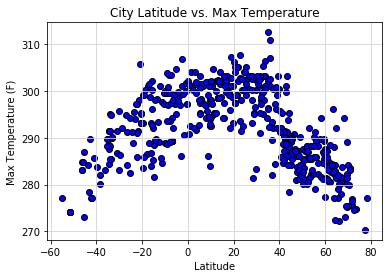

In [6]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Images/plot1.png")
plt.show()

These graphs were tricky because I was looking at just the examples in the starter code to try to make them just with the variables I created. Created a basic scatter plot per the examples to compare latitude with each of the variables and plugged in the variables I defined. Added titles per the example code. To get the grid I did google how to make the lines lighter to match as best I could. I used the first link that came up (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.grid.html) and just played around with each of the options until I got a good result. Then saved the figures in the images folder I created. I was never sure on the right color for the points, so I just went with a regular blue. 

#### Latitude vs. Humidity Plot

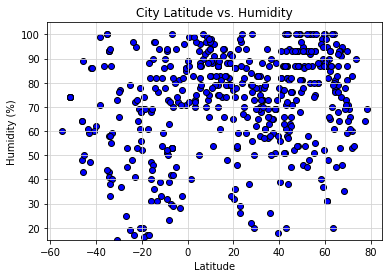

In [7]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Images/plot2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

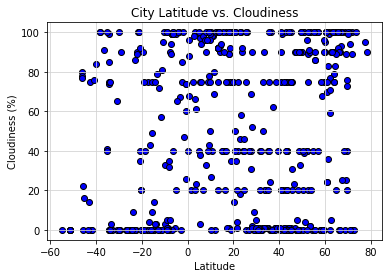

In [8]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Images/plot3.png")
plt.show()

For the rest of the plots I copy and pasted the code I already made and replaced the variables. 

#### Latitude vs. Wind Speed Plot

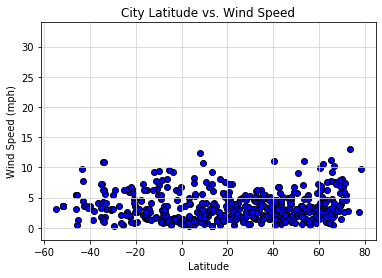

In [9]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Images/plot4.png")
plt.show()

Once I finished everything and knew that my plots were ready for data, I re ran my entire code and hoped for the best. At first I got a lot of errors, first I missed the keys altogether because the example from class I pulled didn't show that. Once I looked through the other examples and found the TV API example I knew I was going to have to dig a little deeper and I started to pull the example city as I indicated above. After two more tries and I lot of time lost it finally worked and the rest of my code started filling in. It was here I started to cleanup what I make and adjust for any typos I had and really see what my data was doing to be able to go over any possible trends. I uploaded my hw and then realized that my last two graphs were saving over my other images because of copy and pasting and not editing my graph code. Another note on my graphs, I adjusted the limits based on the starter code expected answers..I didn't add a date because I was honestly not sure what that meant, but after working on the project and my groupmates explaining why the API was good because it was immediate data, I suppose that the dates would have just been whatever date I ran the code? 
After everything ran and I didn't get any errors and it looked as close to the starter code answers as I could make it AND saved the graphs approprately I submitted this version (2nd try after uploading the graphs that saved over each other). 

Observable Trends: 

1.There is no identifiable correlation between cloudiness and latitude. 
2. As latitutde approaches 0, the temparature increases. 
3. At about 0 lattitude, humidty is primarily at a maximum 100%; other than at 0, there is no correlation between humidity and latitude. 